### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>Preliminary</strong></span>

In [95]:
# Import libraries
import pandas as pd
import numpy as np

In [96]:
# Read ACHI data
path_achi = 'data/interven.txt'
df_achi = pd.read_csv(path_achi)

In [97]:
# Read raw patient data
path_raw = '/Users/kevingiam/Aspera/FIT-Anaesthetist-Patient-Registry/Patient Registry Dataset (Shared)/PCORETestData_DATA_LABELS_2022-11-03_1002.csv'
df_raw = pd.read_csv(path_raw)

/var/folders/hx/bb3zm06j25b4j5wb97_l5rb00000gn/T/ipykernel_1910/2607410961.py:3: DtypeWarning: Columns (8,11,12,17,18,21,22,23,24,27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(path_raw)


### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>df_achi Cleaning</strong></span>

In [98]:
# Rename columns
df_achi.rename(
    columns={
        'Code_id'           : 'achi_id',
        'Block'             : 'block',
        'ascii_desc'        : 'achi_long',
        'ascii_short_desc'  : 'achi_short',
        'Stype'             : 's_type',
        'AgeL'              : 'age_l',
        'AgeH'              : 'age_h',
        'Atype'             : 'a_type'
    },
    inplace=True
)

# Remove hyphen
df_achi['achi_id'].replace(
    {
        '-'  : ''
    },
    inplace=True,
    regex=True
)

In [99]:
df_achi[df_achi['achi_id'] == '3410900']

,achi_id,block,achi_long,achi_short,effective_from,inactive,sex,s_type,age_l,age_h,a_type
1682,3410900,699,Biopsy of temporal artery,Biopsy of temporal artery,1/7/1998,NaN,NaN,NaN,NaN,NaN,NaN


### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>df_raw Cleaning</strong></span>

In [163]:
a = {
        'Record ID'                                     : 'record_id',
        'Data Access Group'                             : 'data_access_group',
        'Hospital Registry ID'                          : 'h_name',
        'Hospital public/private'                       : 'h_public_private',
        'Hospital postcode'                             : 'h_postcode',
        'Hospital Statistical Level Area 2 (SLA2)'      : 'h_sla2',
        'Registry Participant ID'                       : 'p_id',
        'Date of Birth'                                 : 'p_birth_date',
        'Sex'                                           : 'p_sex',
        'Australian Postcode'                           : 'p_postcode',
        'Statistical Area level 2 Code'                 : 'p_sla2',
        'ATSI Status'                                   : 'p_atsi',
        'Patient Election Status'                       : 'p_election',
        'Date of Admission'                             : 'p_admission_date',
        'Admission Urgency Status'                      : 'p_admission_urgency',
        'Date of Surgery'                               : 'p_surgery_date',
        'Age at Date of Surgery'                        : 'p_surgery_age',
        'Surgical Urgency'                              : 'p_surgery_urgency',
        'Type of Surgery'                               : 'p_surgery_type',
        'Name of Procedure'                             : 'p_procedure_name',
        'Procedure Code'                                : 'p_procedure_code',
        'Principal Diagnosis Code'                      : 'p_principal_diagnosis_code',
        'ASA-PS'                                        : 'p_asa_ps',
        'Clinical Frailty Scale'                        : 'p_clinical_frailty_scale',
        'Albumin'                                       : 'p_albumin',
        'Cancer Status'                                 : 'p_cancer',
        'Additional Diagnosis Codes'                    : 'p_additional_diagnosis_code',
        'Critical Care Bed Request'                     : 'p_critical_care_bed_request',
        'Critical Care  Admission Status'               : 'p_critical_care_admission_status',
        'ICU Adult Patient Database Identifier'         : 'p_icu_identifier',
        'Critical Care Length of Stay'                  : 'p_critical_care_hours_los',
        'Critical Care Ventilated Hours - Invasive'     : 'p_critical_care_hours_ventilated_invasive',
        'Critical Care Ventilated Hours - Non-Invasive' : 'p_critical_care_hours_ventilated_non_invasive',
        'Separation Date'                               : 'p_separation_date',
        'Separation Mode'                               : 'p_separation_mode',
        'Date of Death'                                 : 'p_death_date',
        'Postoperative Length of Stay'                  : 'p_postoperative_days_los',
        'Complete?'                                     : 'complete_status'
    }

In [100]:
# Rename columns
df_raw.rename(
    columns={
        'Record ID'                                     : 'record_id',
        'Data Access Group'                             : 'data_access_group',
        'Hospital Registry ID'                          : 'h_name',
        'Hospital public/private'                       : 'h_public_private',
        'Hospital postcode'                             : 'h_postcode',
        'Hospital Statistical Level Area 2 (SLA2)'      : 'h_sla2',
        'Registry Participant ID'                       : 'p_id',
        'Date of Birth'                                 : 'p_birth_date',
        'Sex'                                           : 'p_sex',
        'Australian Postcode'                           : 'p_postcode',
        'Statistical Area level 2 Code'                 : 'p_sla2',
        'ATSI Status'                                   : 'p_atsi',
        'Patient Election Status'                       : 'p_election',
        'Date of Admission'                             : 'p_admission_date',
        'Admission Urgency Status'                      : 'p_admission_urgency',
        'Date of Surgery'                               : 'p_surgery_date',
        'Age at Date of Surgery'                        : 'p_surgery_age',
        'Surgical Urgency'                              : 'p_surgery_urgency',
        'Type of Surgery'                               : 'p_surgery_type',
        'Name of Procedure'                             : 'p_procedure_name',
        'Procedure Code'                                : 'p_procedure_code',
        'Principal Diagnosis Code'                      : 'p_principal_diagnosis_code',
        'ASA-PS'                                        : 'p_asa_ps',
        'Clinical Frailty Scale'                        : 'p_clinical_frailty_scale',
        'Albumin'                                       : 'p_albumin',
        'Cancer Status'                                 : 'p_cancer',
        'Additional Diagnosis Codes'                    : 'p_additional_diagnosis_code',
        'Critical Care Bed Request'                     : 'p_critical_care_bed_request',
        'Critical Care  Admission Status'               : 'p_critical_care_admission_status',
        'ICU Adult Patient Database Identifier'         : 'p_icu_identifier',
        'Critical Care Length of Stay'                  : 'p_critical_care_hours_los',
        'Critical Care Ventilated Hours - Invasive'     : 'p_critical_care_hours_ventilated_invasive',
        'Critical Care Ventilated Hours - Non-Invasive' : 'p_critical_care_hours_ventilated_non_invasive',
        'Separation Date'                               : 'p_separation_date',
        'Separation Mode'                               : 'p_separation_mode',
        'Date of Death'                                 : 'p_death_date',
        'Postoperative Length of Stay'                  : 'p_postoperative_days_los',
        'Complete?'                                     : 'complete_status'
    },
    inplace=True
)

In [101]:
# Drop unnecessary columns
df_raw.drop(
    columns=[
        'record_id', 
        'data_access_group', 
        'h_public_private', 
        'h_postcode',
        'h_sla2',
        'p_id',
        'complete_status',
        'p_icu_identifier',
        'p_sla2',
    ],
    inplace = True,
    errors='ignore'
)

In [102]:
# Fix missing surgery dates
print(f"Total missing data before imputation: {df_raw['p_surgery_date'].isnull().sum()}")
df_raw['p_surgery_date'] = df_raw['p_surgery_date'].fillna(df_raw['p_admission_date'])

Total missing data before imputation: 2


In [103]:
# Parse dates
df_raw['p_birth_date'] = pd.to_datetime(df_raw['p_birth_date'], format=r'%d/%m/%Y', exact=True)
df_raw['p_admission_date'] = pd.to_datetime(df_raw['p_admission_date'], format=r'%d/%m/%Y', exact=True)
df_raw['p_surgery_date'] = pd.to_datetime(df_raw['p_surgery_date'], format=r'%d/%m/%Y', exact=True)
df_raw['p_separation_date'] = pd.to_datetime(df_raw['p_separation_date'], format=r'%d/%m/%Y', exact=True)
df_raw['p_death_date'] = pd.to_datetime(df_raw['p_death_date'], format=r'%d/%m/%Y', exact=True)

# Calculate surgery age
df_raw['p_surgery_age'] = df_raw['p_surgery_date'] - df_raw['p_birth_date']
df_raw['p_surgery_age'] = df_raw['p_surgery_age'].apply(lambda row: int(np.floor(row.days/365)))

In [104]:
# Clean sex column
df_raw['p_sex'].replace(
    {
        '1'     : 'Male',
        1       : 'Male',
        'MALE'  : 'Male',
        '2'     : 'Female',
        2       : 'Female',
        'FEMALE': 'Female',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

# Clean atsi column
df_raw['p_atsi'].replace(
    {
        '1': 'Aboriginal not Torres Strait Islander',      1: 'Aboriginal not Torres Strait Islander',
        '2': 'Torres Strait Islander not Aboriginal',      2: 'Torres Strait Islander not Aboriginal',
        '3': 'Both Aboriginal & Torres Strait Islander',   3: 'Both Aboriginal & Torres Strait Islander',
        '4': 'Not Aboriginal or Torres Strait Islander',   4: 'Not Aboriginal or Torres Strait Islander',
        '9': 'Not Stated-Unknown',                         9: 'Not Stated-Unknown',
        ' ': np.nan,
        # np.nan  : 'Not Stated-Unknown',
        # ' '     : 'Not Stated-Unknown'
    },
    inplace=True
)

# Clean election column
df_raw['p_election'].replace(
    {
        1                                       : 'Public',
        2                                       : 'Private',
        'Private - Insured'                     : 'Private',
        'Overseas Visitor'                      : 'Other types',
        'Overseas Visitors'                     : 'Other types',
        'Overseas Visitors - Public Ineligible' : 'Other types',
        'Bulk Bill'                             : 'Other types',
        'Transport Accident Commission'         : 'Other types',
        'Workcover'                             : 'Other types',
        'Department of Veterans Affairs'        : 'Other types',
        'Transitional Care Program'             : 'Other types',
        'Other Compensable'                     : 'Other types',
        'Reciprocal Health Care Agreement'      : 'Other types',
        'Organ Procurement'                     : 'Other types',
        'To Be Confirmed'                       : 'Not Stated-Unknown',
        'Not Specified'                         : 'Not Stated-Unknown',
        ' ': np.nan,
        # np.nan                                  : 'Not Stated-Unknown',
        # ' '                                     : 'Not Stated-Unknown'
    },
    inplace=True
)

# Clean admission urgency column
df_raw['p_admission_urgency'].replace(
    {
        1       : 'Emergency',
        2       : 'Elective',
        3       : 'Not Stated-Unknown',
        9       : 'Not Stated-Unknown',
        ' ': np.nan,
        # np.nan  : 'Not Stated-Unknown',
        # ' '     : 'Not Stated-Unknown'
    },
    inplace=True
)

# Clean surgery urgency column
df_raw['p_surgery_urgency'].replace(
    {
        1               : 'Elective',
        '1'             : 'Elective',
        2               : 'Inpatient urgent',
        '2'             : 'Inpatient urgent',
        3               : 'Emergency',
        '3'             : 'Emergency',
        4               : 'Immediate',
        '4'             : 'Immediate',
        ' ': np.nan,
        # np.nan          : np.nan,
        # ' '             : np.nan,
    },
    inplace=True
)

# Clean surgery type column
df_raw['p_surgery_type'] = df_raw['p_surgery_type'].str.replace(r'^zzz', '', regex=True)

df_raw['p_surgery_type'].replace(
    {
        ' of$'  : '',
        np.nan  : np.nan,
        '^ $'   : np.nan,
    },
    inplace=True,
    regex=True
)

# Clean ASA-PS
df_raw['p_asa_ps'].replace(
    {
        '1'     : 1, 1.0     : 1, '1E'     : 1,
        '2'     : 2, 2.0     : 2, '2E'     : 2,
        '3'     : 3, 3.0     : 3, '3E'     : 3,
        '4'     : 4, 4.0     : 4, '4E'     : 4,
        '5'     : 5, 5.0     : 5, '5E'     : 5,
        '9E'    : np.nan,
        ' '     : np.nan
    },
    inplace=True
)

# Clean clinical fratility scale
df_raw['p_clinical_frailty_scale'].replace(
    {
        '1': '1 - Very fit',               1: '1 - Very fit',             1.0: '1 - Very fit',
        '2': '2 - Well',                   2: '2 - Well',                 2.0: '2 - Well',
        '3': '3 - Managing well',          3: '3 - Managing well',        3.0: '3 - Managing well',
        '4': '4 - Vulnerable',             4: '4 - Vulnerable',           4.0: '4 - Vulnerable',
        '5': '5 - Mildly frail',           5: '5 - Mildly frail',         5.0: '5 - Mildly frail',
        '6': '6 - Moderately frail',       6: '6 - Moderately frail',     6.0: '6 - Moderately frail',
        '7': '7 - Severely frail',         7: '7 - Severely frail',       7.0: '7 - Severely frail',
        '8': '8 - Very severely frail',    8: '8 - Very severely frail',  8.0: '8 - Very severely frail',
        '9': '9 - Terminally ill',         9: '9 - Terminally ill',       9.0: '9 - Terminally ill',
        'Well, with comorbid disease': '2 - Well',
        np.nan          : np.nan,
        ' '             : np.nan,
    },
    inplace=True
)

# Clean cancer data
df_raw['p_cancer'].replace(
    {
        '0'     : '0 - No cancer',
        0       : '0 - No cancer',
        0.0     : '0 - No cancer',
        '1'     : '1 - Cancer, leukaemia or lymphoma',
        1       : '1 - Cancer, leukaemia or lymphoma',
        1.0     : '1 - Cancer, leukaemia or lymphoma',
        '2'     : '2 - Solid malignancy with local lymph node involvement',
        2       : '2 - Solid malignancy with local lymph node involvement',                 
        2.0     : '2 - Solid malignancy with local lymph node involvement',
        '3'     : '3 - Solid malignancy with distant metastases',
        3       : '3 - Solid malignancy with distant metastases',
        3.0     : '3 - Solid malignancy with distant metastases',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

# Clean critical care bed request
df_raw['p_critical_care_bed_request'].replace(
    {
        '0'     : 'No',
        0       : 'No',
        0.0     : 'No',
        '1'     : 'Yes',
        1       : 'Yes',
        1.0     : 'Yes',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

# Clean critical care admission status
df_raw['p_critical_care_admission_status'].replace(
    {
        '0'     : 'Not admitted',
        0       : 'Not admitted',
        0.0     : 'Not admitted',
        '1'     : 'Planned admission',
        1       : 'Planned admission',
        1.0     : 'Planned admission',
        '2'     : 'Unplanned admission',
        2       : 'Unplanned admission',
        2.0     : 'Unplanned admission',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

# Clean separation mode
df_raw['p_separation_mode'].replace(
    {
        '1'     : 'Acute hospital',                         1       : 'Acute hospital',                         1.0     : 'Acute hospital',
        '2'     : 'Residential aged care service',          2       : 'Residential aged care service',          2.0     : 'Residential aged care service',
        '3'     : 'Psychiatric hospital',                   3       : 'Psychiatric hospital',                   3.0     : 'Psychiatric hospital',
        '4'     : 'Other health care accommodation',        4       : 'Other health care accommodation',        4.0     : 'Other health care accommodation',
        '5'     : 'Statistical discharge - type change',    5       : 'Statistical discharge - type change',    5.0     : 'Statistical discharge - type change',
        '6'     : 'Discharged at own risk',                 6       : 'Discharged at own risk',                 6.0     : 'Discharged at own risk',
        '7'     : 'Statistical discharge - from leave',     7       : 'Statistical discharge - from leave',     7.0     : 'Statistical discharge - from leave',
        '8'     : 'Died',                                   8       : 'Died',                                   8.0     : 'Died',
        '9'     : 'Other',                                  9       : 'Other',                                  9.0     : 'Other',
        'Hospital Transfer'                 : 'Acute hospital',
        'Died in Hospital'                  : 'Died',
        'Residential Aged Care Services'    : 'Residential aged care service',
        'Other Health Care Establishment'   : 'Other health care accommodation',
        'Discharged at Own Risk'            : 'Discharged at own risk',
        'Left against medical advice'       : 'Discharged at own risk',
        'Non-Return from Leave'             : 'Statistical discharge - from leave',
        'Statistical discharge, from leave' : 'Statistical discharge - from leave',
        'RACS USUAL PLACE OF RESIDENCE'     : 'Other',
        'Home-Usual Residence'              : 'Other',
        '0'                                 : 'Other',
        'Correctional Facility'             : 'Other',
        np.nan  : np.nan,
        ' '     : np.nan,
    },
    inplace=True
)

In [105]:
# Get ACHI
achi_fmc = df_raw.loc[df_raw['h_name'] == 'Flinders Medical Centre', 'p_principal_diagnosis_code']
achi_pm = df_raw.loc[df_raw['h_name'] == 'Peter Maccallum', 'p_procedure_code']
achi_pa = df_raw.loc[df_raw['h_name'] == 'Princess Alexandra Hospital', 'p_procedure_code']
achi_ah = df_raw.loc[df_raw['h_name'] == 'Alfred Health', 'p_procedure_name']

# Set ACHI
df_raw.loc[df_raw['h_name'] == 'Flinders Medical Centre', 'p_achi_id'] = achi_fmc
df_raw.loc[df_raw['h_name'] == 'Peter Maccallum', 'p_achi_id'] = achi_pm
# df_raw.loc[df_raw['h_name'] == 'Princess Alexandra Hospital', 'p_achi_id'] = achi_pa
df_raw.loc[df_raw['h_name'] == 'Alfred Health', 'p_achi_id'] = achi_ah

In [106]:
# Derive patient length of stay column
df_raw['p_los'] = df_raw['p_separation_date'] - df_raw['p_admission_date']
df_raw['p_los'] = df_raw['p_los'].apply(lambda row: row.days)

In [107]:
# Get unique values
pd.DataFrame(df_raw.apply(lambda col: len(col.unique())))

,0
h_name,4
p_birth_date,20417
p_sex,2
p_postcode,1246
p_atsi,6
p_election,5
p_admission_date,498
p_admission_urgency,4
p_surgery_date,418
p_surgery_age,114


In [108]:
# Dtype info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45023 entries, 0 to 45022
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   h_name                                         45023 non-null  object        
 1   p_birth_date                                   45023 non-null  datetime64[ns]
 2   p_sex                                          45023 non-null  object        
 3   p_postcode                                     44955 non-null  float64       
 4   p_atsi                                         45022 non-null  object        
 5   p_election                                     34106 non-null  object        
 6   p_admission_date                               45023 non-null  datetime64[ns]
 7   p_admission_urgency                            34487 non-null  object        
 8   p_surgery_date                                 45023 non

In [109]:
# Copy the data frame
df_eda = df_raw.copy(deep=True)

### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>Null Values</strong></span>

In [110]:
# Percentage of null values
df_raw.isnull().sum()/df_raw.shape[0]*100

h_name                                            0.000000
p_birth_date                                      0.000000
p_sex                                             0.000000
p_postcode                                        0.151034
p_atsi                                            0.002221
p_election                                       24.247607
p_admission_date                                  0.000000
p_admission_urgency                              23.401373
p_surgery_date                                    0.000000
p_surgery_age                                     0.000000
p_surgery_urgency                                42.804789
p_surgery_type                                   61.701797
p_procedure_name                                  5.275082
p_procedure_code                                  2.070053
p_principal_diagnosis_code                       28.214468
p_asa_ps                                         10.376918
p_clinical_frailty_scale                         34.5556

In [111]:
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
df_raw.drop(
    columns=[
        'p_surgery_urgency',
        'p_clinical_frailty_scale',
        'p_albumin',
        'p_cancer',
        'p_critical_care_admission_status',
        'p_critical_care_hours_ventilated_invasive',
        'p_critical_care_hours_ventilated_non_invasive',
        'p_surgery_type',
        'p_principal_diagnosis_code',
        'p_additional_diagnosis_code',
        'p_critical_care_bed_request',
        'p_critical_care_hours_los'
    ],
    inplace = True,
    errors='ignore'
)

df_raw.isnull().sum()/df_raw.shape[0]*100

h_name                       0.000000
p_birth_date                 0.000000
p_sex                        0.000000
p_postcode                   0.151034
p_atsi                       0.002221
p_election                  24.247607
p_admission_date             0.000000
p_admission_urgency         23.401373
p_surgery_date               0.000000
p_surgery_age                0.000000
p_procedure_name             5.275082
p_procedure_code             2.070053
p_asa_ps                    10.376918
p_separation_date            0.000000
p_separation_mode            0.000000
p_postoperative_days_los     0.004442
p_achi_id                   26.983986
p_los                        0.000000
dtype: float64

In [112]:
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
# DROP NA MUST BE REMOVED
df_raw.dropna(how='any', inplace=True)

In [113]:
# Convert data types
df_raw['p_asa_ps'] = df_raw['p_asa_ps'].astype('int')
df_raw['p_achi_id'] = df_raw['p_achi_id'].astype('int')

In [114]:
# Save to CSV
df_raw.to_csv("/Users/kevingiam/Aspera/Home/pcore_clean_2022_11_03.csv", index=False)

### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>EDA</strong></span>

<AxesSubplot: >

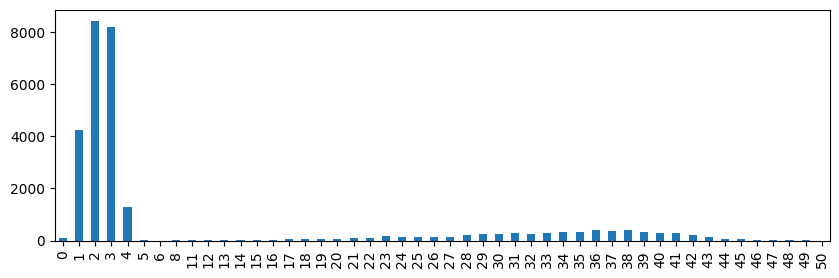

In [157]:
# Invalid values for ASA-PS column (correct value should be between 0 and 5)
df_raw['p_asa_ps'].value_counts()\
                  .sort_index()\
                  .plot(kind='bar', figsize=(10,3))

<AxesSubplot: >

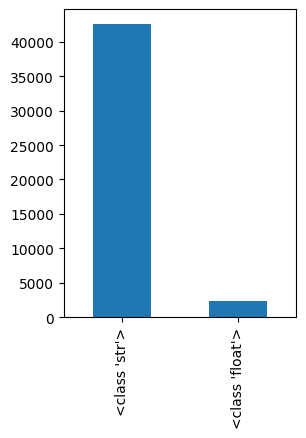

In [121]:
# Multiple data types for `Name of Procedure` column (e.g. some values are integer `4934600`, some values are string `Cardioversion`)
df_eda['p_procedure_name'].apply(lambda val: type(val)).value_counts().plot(kind='bar', figsize=(3,4))

### <span style='color:#005f73; font-family:Lucida Grande; background-color:#fffbed'><strong>Algorithm</strong></span>

In [117]:
# Algorithm
# Categorical: Between hospitals, KL divergence
# Numeric: Between hospitals, KL divergence
# Numeric: In hospital
# Date
def algo(df, h_name_col):
    for col in list(df_raw.columns).remove('h_name_col'):
        # Abnormal data types
        d_type = {type(val) for val in df[col].unique()}
        d_type_len = len(d_type)
        if d_type_len > 1:
            print("Wrong")
        break

In [194]:
date_columns = ['p_birth_date', 'p_admission_date', 'p_surgery_date', 'p_separation_date', 'p_death_date']
df_raw = pd.read_csv('/Users/kevingiam/Aspera/Home/pcore_clean_2022_11_03.csv', parse_dates=date_columns)
df_raw

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/kevingiam/miniforge3/envs/py_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/hx/bb3zm06j25b4j5wb97_l5rb00000gn/T/ipykernel_1910/2177562435.py", line 2, in <module>
    df_raw = pd.read_csv('/Users/kevingiam/Aspera/Home/pcore_clean_2022_11_03.csv', parse_dates=date_columns)
  File "/Users/kevingiam/miniforge3/envs/py_env/lib/python3.10/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    else p
  File "/Users/kevingiam/miniforge3/envs/py_env/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 678, in read_csv
    *,
  File "/Users/kevingiam/miniforge3/envs/py_env/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 575, in _read
    # if we pass a date_parser and parse_dates=False, we should not parse the
  File "/Users/kevingiam/miniforge3/envs/py_env/lib/python3.10/site-packages/p